In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Model libraries
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv(r'C:\Users\ELITEBOOK\Desktop\Datascience\Time_series_project\craigslist_vehicles.csv')
data.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


In [7]:
data.shape

(426880, 28)

In [8]:
data.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,426880.000000,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,213439.500000,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,123229.785793,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,106719.750000,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,213439.500000,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,320159.250000,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,426879.000000,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [9]:
data.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long', 'posting_date', 'removal_date'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    426880 non-null  int64  
 1   id            426880 non-null  int64  
 2   url           426880 non-null  object 
 3   region        426880 non-null  object 
 4   region_url    426880 non-null  object 
 5   price         426880 non-null  int64  
 6   year          425675 non-null  float64
 7   manufacturer  409234 non-null  object 
 8   model         421603 non-null  object 
 9   condition     252776 non-null  object 
 10  cylinders     249202 non-null  object 
 11  fuel          423867 non-null  object 
 12  odometer      422480 non-null  float64
 13  title_status  418638 non-null  object 
 14  transmission  424324 non-null  object 
 15  VIN           265838 non-null  object 
 16  drive         296313 non-null  object 
 17  size          120519 non-null  object 
 18  type

In [11]:
null_values_count = data.isnull().sum()
print(null_values_count)

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
removal_date        68
dtype: int64


# Data cleaning

In [12]:
# removing unnecessary columns
del_columns = ['Unnamed: 0', 'url', 'region_url', 'image_url', 'lat',
       'long', 'description', 'county', 'state', 'VIN', 'size', 'removal_date']

data = data.drop(columns=del_columns)

In [13]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,posting_date
0,7307679724,abilene,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,2021-04-16 00:00:00+00:00
1,7311833696,abilene,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,2021-04-24 00:00:00+00:00
2,7311441996,abilene,4900,2006.0,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,automatic,fwd,sedan,silver,2021-04-23 00:00:00+00:00
3,7307680715,abilene,6500,2008.0,ford,expedition,NaN,NaN,gas,206000.0,clean,automatic,NaN,NaN,NaN,2021-04-16 00:00:00+00:00
4,7311834578,abilene,6500,2008.0,ford,expedition,NaN,NaN,gas,206000.0,clean,automatic,NaN,NaN,NaN,2021-04-24 00:00:00+00:00


In [14]:
#Handling missing values
data.isnull().values.any()

data.isna().sum()/data.shape[0]*100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
paint_color     30.501078
posting_date     0.015930
dtype: float64

In [15]:
# filling missing values in categorical data with mode
categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'drive', 'type', 'paint_color', 'title_status', 'transmission']

data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0], axis=0)

In [16]:
# Handle missing values in numerical columns
numerical_columns = ['odometer', 'year']

data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

In [17]:
# Converting year from float type to integer type
data['year'] = data['year'].astype(int)

In [18]:
# Convert posting_date column to datetime
data['posting_date'] = pd.to_datetime(data['posting_date'])

In [19]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,posting_date
0,7307679724,abilene,4500,2002,bmw,x5,good,6 cylinders,gas,184000.0,clean,automatic,4wd,sedan,white,2021-04-16 00:00:00+00:00
1,7311833696,abilene,4500,2002,bmw,x5,good,6 cylinders,gas,184000.0,clean,automatic,4wd,sedan,white,2021-04-24 00:00:00+00:00
2,7311441996,abilene,4900,2006,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,automatic,fwd,sedan,silver,2021-04-23 00:00:00+00:00
3,7307680715,abilene,6500,2008,ford,expedition,good,6 cylinders,gas,206000.0,clean,automatic,4wd,sedan,white,2021-04-16 00:00:00+00:00
4,7311834578,abilene,6500,2008,ford,expedition,good,6 cylinders,gas,206000.0,clean,automatic,4wd,sedan,white,2021-04-24 00:00:00+00:00


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   id            426880 non-null  int64              
 1   region        426880 non-null  object             
 2   price         426880 non-null  int64              
 3   year          426880 non-null  int32              
 4   manufacturer  426880 non-null  object             
 5   model         426880 non-null  object             
 6   condition     426880 non-null  object             
 7   cylinders     426880 non-null  object             
 8   fuel          426880 non-null  object             
 9   odometer      426880 non-null  float64            
 10  title_status  426880 non-null  object             
 11  transmission  426880 non-null  object             
 12  drive         426880 non-null  object             
 13  type          426880 non-null  object       

In [21]:
#look for duplicate values
data.duplicated().values.any()

False

# Time series analysis

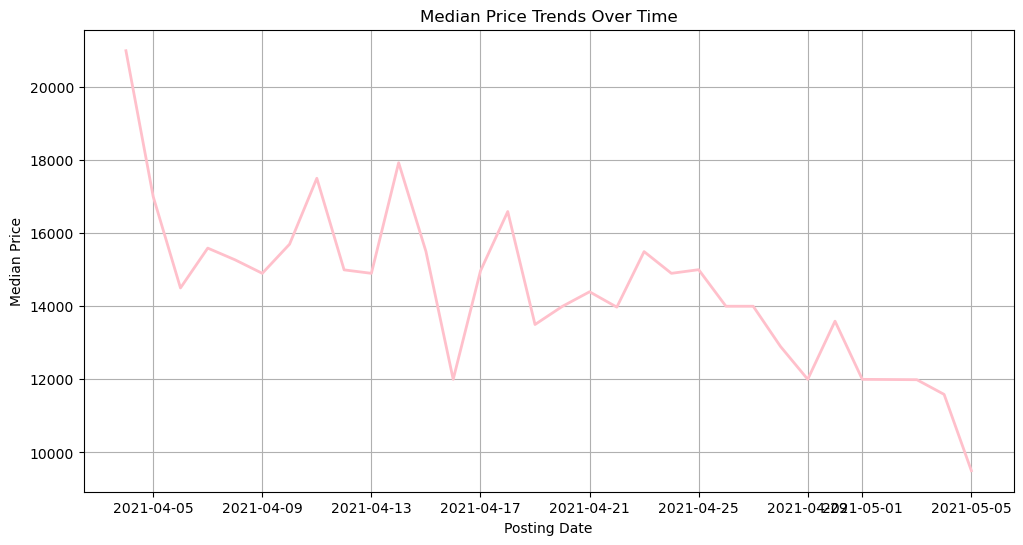

In [22]:
# Grouping by 'posting_date' and calculating the median price for each date
price_trend = data.groupby(pd.Grouper(key='posting_date', freq='D'))['price'].median()

# Creating a line plot to visualize the median price trends over time
plt.figure(figsize=(12, 6))
plt.plot(price_trend.index, price_trend.values, color='pink', linewidth=2)
plt.title('Median Price Trends Over Time')
plt.xlabel('Posting Date')
plt.ylabel('Median Price')
plt.grid(True)

plt.show()


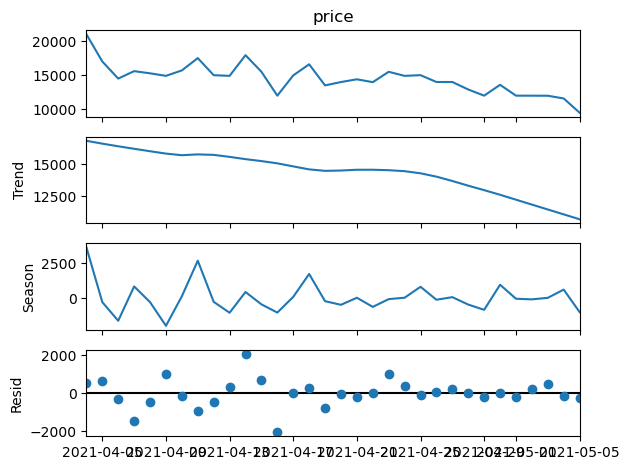

In [23]:
# Decomposing the time series into trend, seasonal, and residual components
from statsmodels.tsa.seasonal import STL
stl = STL(price_trend, seasonal=13)  
result = stl.fit()
result.plot()
plt.show()

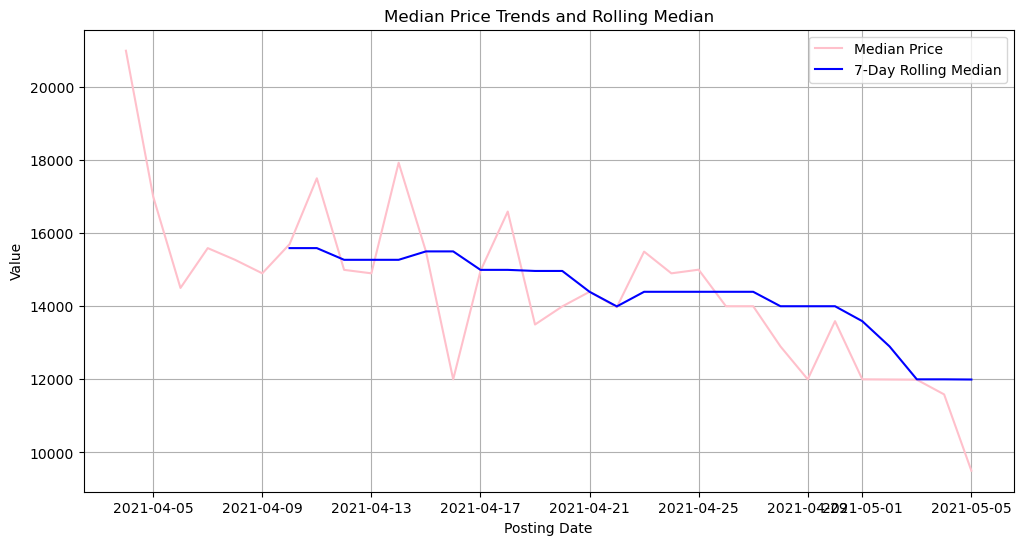

In [25]:
# Calculating the rolling median and rolling median absolute deviation
rolling_median = price_trend.rolling(window=7).median()  # 7-day rolling median
plt.figure(figsize=(12, 6))
plt.plot(price_trend.index, price_trend.values, color='pink', label='Median Price')
plt.plot(rolling_median.index, rolling_median.values, color='blue', label='7-Day Rolling Median')
plt.title('Median Price Trends and Rolling Median')
plt.xlabel('Posting Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()